In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Q1) Predict delivery time using sorting time

In [107]:
#Read data
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [108]:
df.rename(columns={'Delivery Time':'Delivery_Time'},inplace = True)

In [109]:
df.rename(columns={'Sorting Time':'Sorting_Time'},inplace = True)

In [110]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [111]:
#Data description
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [112]:
#check for missing values
df.isna().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

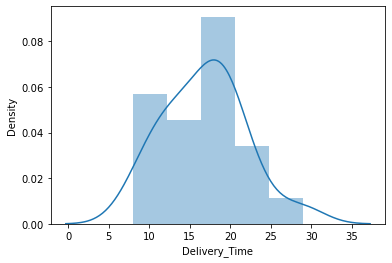

In [113]:
#Data distribution

sns.distplot(df['Delivery_Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

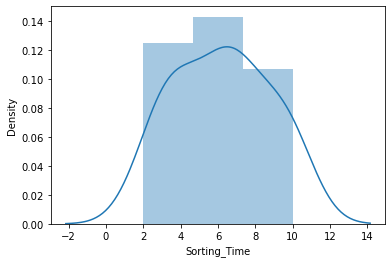

In [114]:
sns.distplot(df['Sorting_Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

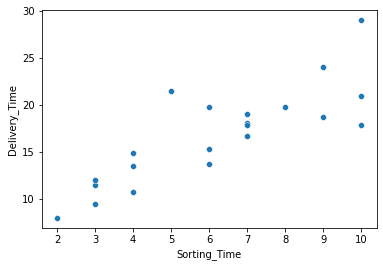

In [115]:
#Correlation analysis
sns.scatterplot(df['Sorting_Time'], df["Delivery_Time"])

In [116]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:>

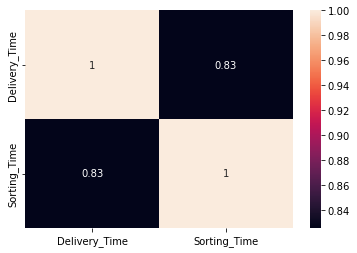

In [117]:
sns.heatmap(df.corr(), annot=True)

In [118]:
#Import statsmodels

import statsmodels.formula.api as smf

model = smf.ols('Delivery_Time~Sorting_Time', data= df).fit()

In [119]:
#model params
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [120]:
#model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        18:49:42   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
#log Transformation
df['log_Delivery_Time'] = np.log1p(df["Delivery_Time"])

<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

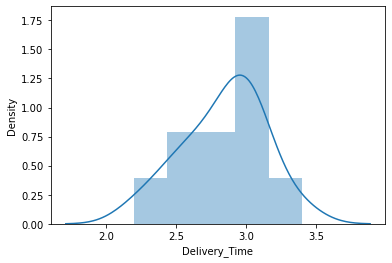

In [122]:
sns.distplot(log_Delivery_Time)

<AxesSubplot:xlabel='Sorting_Time', ylabel='log_Delivery_Time'>

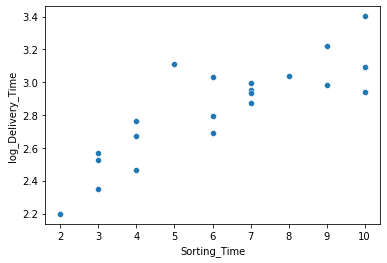

In [123]:
#Correlation analysis
sns.scatterplot(df['Sorting_Time'], df["log_Delivery_Time"])

In [124]:
df.corr()

,Delivery_Time,Sorting_Time,log_Delivery_Time
Delivery_Time,1.000000,0.825997,0.983661
Sorting_Time,0.825997,1.000000,0.843312
log_Delivery_Time,0.983661,0.843312,1.000000


In [125]:
#Import statsmodels

import statsmodels.formula.api as smf

model = smf.ols('log_Delivery_Time~Sorting_Time', data= df).fit()

In [126]:
#model params
model.params

Intercept       2.226678
Sorting_Time    0.098766
dtype: float64

In [127]:
#model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_Delivery_Time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.78
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           1.58e-06
Time:                        18:50:06   Log-Likelihood:                 9.1989
No. Observations:                  21   AIC:                            -14.40
Df Residuals:                      19   BIC:                            -12.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.2267      0.096     23.122      0.000       2.025       2.428
Sorting_Time     0.0988      0.014      6.840      0.000       0.069       0.129
==============================================================================
Omnibus:                        1.374   Durbin-Watson:                   1.314
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.631
Skew:                           0.423   Prob(JB):                        0.730
Kurtosis:                       3.078   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
#line equation
x = 7
y = 0.0988*x+2.2267
y

2.9183000000000003

# Prediction for new data

In [129]:
newadata = pd.Series([7,10,9])

newdata = pd.DataFrame(newadata, columns=['Sorting_Time'])

newdata

,Sorting_Time
0,7
1,10
2,9


In [130]:
model.predict(newdata)

0    2.918041
1    3.214339
2    3.115573
dtype: float64

## Q2)  Build a prediction model for Salary_hike


In [139]:
#Read data
df1 = pd.read_csv('Salary_Data.csv')
df1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [140]:
#Data description

df1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

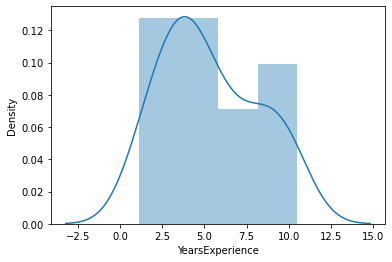

In [141]:
#Data distribution

sns.distplot(df1['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

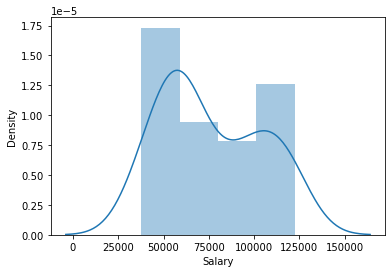

In [142]:
#Data distribution

sns.distplot(df1['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

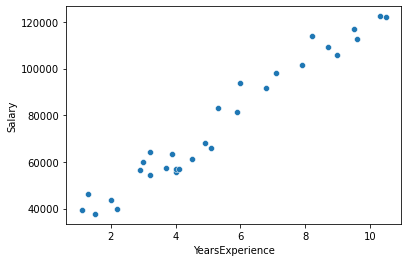

In [143]:
#Correlation analysis

sns.scatterplot(df1['YearsExperience'], df1['Salary'])

In [144]:
df1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

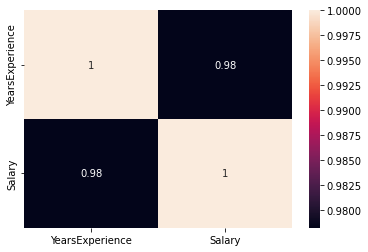

In [145]:
sns.heatmap(df1.corr(), annot=True)

In [146]:
#Import statsmodels

import statsmodels.formula.api as smf

model1 =  smf.ols('Salary~YearsExperience', data= df1).fit()

In [147]:
#model parameters
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [148]:
#model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        18:55:22   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Based on the summary, R-squared value is 0.957.

In [149]:
#line equation
x = 5.1
y = 9449.9623*x+25792.200199
y

73987.00792899998

# Prediction for new data

In [150]:
df1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [151]:
newadata = pd.Series([5.1,8.5,11])

newdata = pd.DataFrame(newadata, columns=['YearsExperience'])

newdata

,YearsExperience
0,5.1
1,8.5
2,11.0


In [152]:
model1.predict(newdata)

0     73987.008038
1    106116.879931
2    129741.785735
dtype: float64